# CDC Disease Data Analysis

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install plotly

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set()

In [2]:
!pip install sodapy
from sodapy import Socrata

###### For this data analysis, we'll be looking at the Centers for Disease Control and Prevention (CDC) disease dataset. 

In [3]:
#establishing the connection with CDC
client = Socrata("chronicdata.cdc.gov", None)

In [4]:
# access CDC data
# results = client.get("g4ie-h725", limit=2000)
results = client.get("g4ie-h725", limit=816000)

In [5]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

## Preliminary Analysis and Subsets

###### A preliminary analysis of the raw dataset shows that there are 19 topics in the disease dataset with over 800,000 records. For this analysis, we'll take a subset of the raw data and only look at the cardiovascular disease in New York. 

In [6]:
# Identify list of topics
results_df.topic.unique()

array(['Tobacco', 'Arthritis', 'Cancer', 'Overarching Conditions',
       'Disability', 'Alcohol', 'Asthma', 'Older Adults',
       'Cardiovascular Disease',
       'Nutrition, Physical Activity, and Weight Status',
       'Chronic Obstructive Pulmonary Disease', 'Chronic Kidney Disease',
       'Diabetes', 'Oral Health', 'Mental Health', 'Immunization',
       'Reproductive Health'], dtype=object)

In [7]:
# Subset raw data to only look at Cardiovascular Disease data
cardio_df = results_df[results_df['topic'] == 'Cardiovascular Disease']
cardio_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,...,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
12,2015,2015,AR,Arkansas,NVSS,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Crude Rate,292.2,...,05,CVD,CVD1_2,CRDRATE,GENDER,GENM,15,998,NaN,NaN
14,2014,2014,IL,Illinois,State Inpatient Data,Cardiovascular Disease,Hospitalization for stroke,NaN,Number,NaN,...,17,CVD,CVD3_1,NMBR,OVERALL,OVR,34,1795,-,No data available
124,2018,2018,ID,Idaho,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,83.5,...,16,CVD,CVD10_2,CRDPREV,GENDER,GENF,5,1687,NaN,NaN
127,2016,2016,TX,Texas,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,80.0,...,48,CVD,CVD1_3,AGEADJRATE,RACE,HIS,23,3109,NaN,NaN
128,2016,2016,KY,Kentucky,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,Number,Number,21,...,21,CVD,CVD1_3,NMBR,RACE,API,36,235,NaN,NaN


In [8]:
cardio_df.shape

(108803, 26)

In [9]:
# Review unique questions in cardiovascular disease dataset
cardio_df.question.unique()

array(['Mortality from diseases of the heart',
       'Hospitalization for stroke',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease',
       'Mortality from coronary heart disease',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke',
       'Mortality from heart failure',
       'Mortality from cerebrovascular disease (stroke)',
       'Cholesterol screening among adults aged >= 18 years',
       'Awareness of high blood pressure among adults aged >= 18 years',
       'High cholesterol prevalence among adults aged >= 18 years',
       'Taking medicine for high blood pressur

In [10]:
# Subset Cardiovascular Disease data for NY only
cardio_ny_df=cardio_df[cardio_df['locationabbr']=='NY']
cardio_ny_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,...,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
923,2017,2017,NY,New York,BRFSS,Cardiovascular Disease,Awareness of high blood pressure among adults ...,%,Crude Prevalence,27.4,...,36,CVD,CVD6_1,CRDPREV,GENDER,GENF,47,2092,NaN,NaN
1479,2016,2016,NY,New York,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,64.5,...,36,CVD,CVD9_2,CRDPREV,OVERALL,OVR,47,2092,NaN,NaN
1786,2016,2016,NY,New York,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure among Medica...,NaN,Number,33810,...,36,CVD,CVD2_0,NMBR,OVERALL,OVR,47,2092,NaN,NaN
2017,2016,2016,NY,New York,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,Number,Number,4164,...,36,CVD,CVD1_3,NMBR,RACE,BLK,47,2092,NaN,NaN
2916,2015,2015,NY,New York,NVSS,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),Number,Number,3653,...,36,CVD,CVD1_5,NMBR,GENDER,GENF,47,2092,NaN,NaN


In [11]:
cardio_ny_df.shape

(2113, 26)

In [12]:
cardio_ny_df.datavalueunit.unique()

array(['%', nan, 'Number', 'cases per 100,000', 'cases per 10,000',
       'cases per 1,000'], dtype=object)

## Data Wrangling

###### This dataset has many columns which can be confusing to look at. To simplify the dataset for analysis, we can trim out columns that are not necessary or repetitive. Since the datatype is object, we also need to convert the "datavalue" column to numeric. 

In [13]:
cardio_ny_df.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
       'datavaluealt', 'lowconfidencelimit', 'highconfidencelimit',
       'stratificationcategory1', 'stratification1', 'geolocation',
       'locationid', 'topicid', 'questionid', 'datavaluetypeid',
       'stratificationcategoryid1', 'stratificationid1',
       ':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8',
       'datavaluefootnotesymbol', 'datavaluefootnote'],
      dtype='object')

In [14]:
# Define columns to keep
columns_list = ['yearstart', 'locationabbr', 'topic', 'question', 'datavalue', 'stratification1']

In [15]:
# Create new dataframe to only include columns of interest, dropping all the other columns
new_cardio_ny_df = cardio_ny_df[columns_list]
new_cardio_ny_df.head()

,yearstart,locationabbr,topic,question,datavalue,stratification1
923,2017,NY,Cardiovascular Disease,Awareness of high blood pressure among adults ...,27.4,Female
1479,2016,NY,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,64.5,Overall
1786,2016,NY,Cardiovascular Disease,Hospitalization for heart failure among Medica...,33810,Overall
2017,2016,NY,Cardiovascular Disease,Mortality from coronary heart disease,4164,"Black, non-Hispanic"
2916,2015,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),3653,Female


In [16]:
# Convert "datavalue" column from object to numeric datatype
new_cardio_ny_df['datavalue'] = pd.to_numeric(new_cardio_ny_df['datavalue'])

C:\Users\chenshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Exploratory Data Analysis (EDA)

###### The cardiovascular disease data includes records from years 2010 through 2017. The data also include values for multiple questions where the data value unit may be measured in numbers, percentage, cases per 100,000, cases per 1,000, cases per 10,000, or NaN. Below is a graph of all the questions and the respective data value. This may not be a good graph since we're comparing data values with different units.

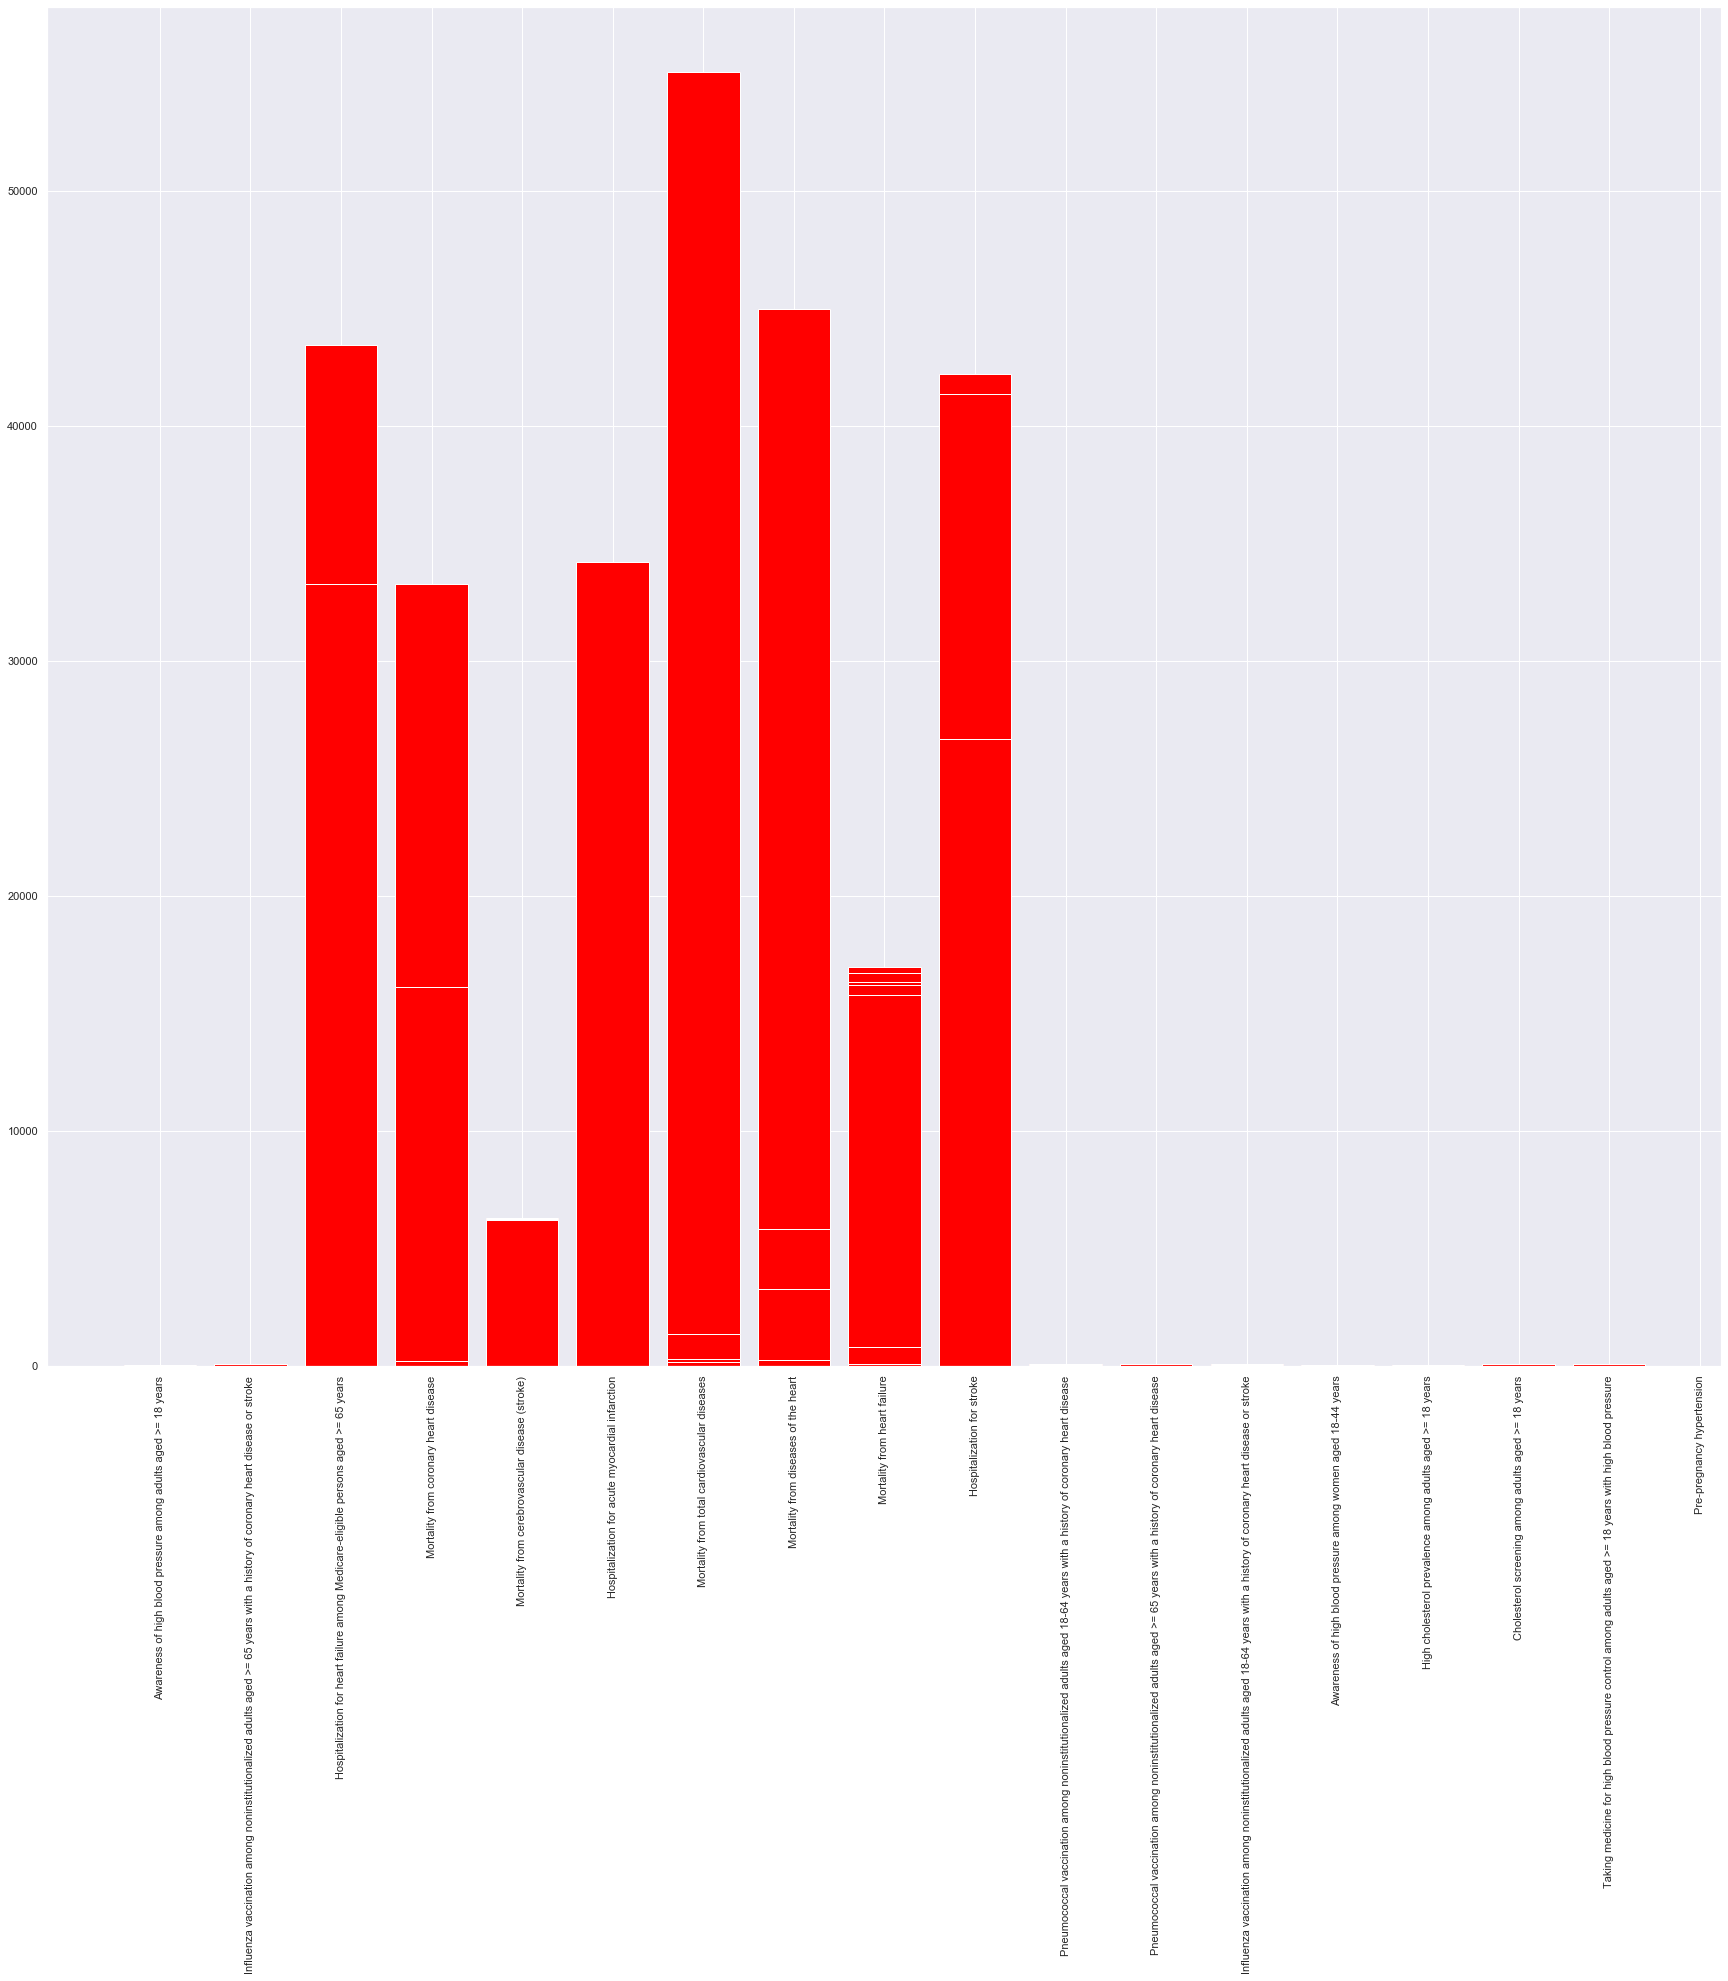

In [17]:
#'Mortality from diseases of the heart',
#'Hospitalization for stroke',
#'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease',
#'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease',
#'Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke',
#'Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke',
#'Mortality from heart failure',
#'Mortality from coronary heart disease',
#'Mortality from cerebrovascular disease (stroke)',
#'Cholesterol screening among adults aged >= 18 years',
#'Awareness of high blood pressure among adults aged >= 18 years',
#'High cholesterol prevalence among adults aged >= 18 years',
#'Taking medicine for high blood pressure control among adults aged >= 18 years with high blood pressure',
#'Awareness of high blood pressure among women aged 18-44 years',
#'Mortality from total cardiovascular diseases',
#'Hospitalization for acute myocardial infarction',
#'Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years',
#'Pre-pregnancy hypertension', in New York

plt.figure(figsize=(30,25))
plt.bar(data=new_cardio_ny_df, x='question', height='datavalue', color = 'red')
plt.xticks(rotation = 90)
plt.show()

###### Here, I want to take a closer look at the mortality of cardiovascular disease. From unique questions, we know there are 4 categories of mortality and then there is the total mortality. 

In [18]:
mortality_heart_ny_df = new_cardio_ny_df[new_cardio_ny_df['question']=='Mortality from diseases of the heart']

In [19]:
mortality_heart_ny_df

,yearstart,locationabbr,topic,question,datavalue,stratification1
4435,2013,NY,Cardiovascular Disease,Mortality from diseases of the heart,22594.0,Female
5341,2016,NY,Cardiovascular Disease,Mortality from diseases of the heart,69.0,American Indian or Alaska Native
5492,2012,NY,Cardiovascular Disease,Mortality from diseases of the heart,3148.0,Hispanic
5996,2016,NY,Cardiovascular Disease,Mortality from diseases of the heart,1434.0,Asian or Pacific Islander
6180,2016,NY,Cardiovascular Disease,Mortality from diseases of the heart,97.2,Hispanic
...,...,...,...,...,...,...
756579,2010,NY,Cardiovascular Disease,Mortality from diseases of the heart,298.5,"White, non-Hispanic"
756889,2010,NY,Cardiovascular Disease,Mortality from diseases of the heart,199.9,Overall
757441,2010,NY,Cardiovascular Disease,Mortality from diseases of the heart,3264.0,Hispanic
757504,2010,NY,Cardiovascular Disease,Mortality from diseases of the heart,199.4,"White, non-Hispanic"


###### The following graph shows the mortality from diseases of the heart by race and gender from years 2010-2017. Based on the graph, White, non-hispanic population has the highest mortality from diseases of the heart whereas Asian or Pacific Islander population has the lowest. We can also see that female and male have about the same mortality from diseases of the heart.

<Figure size 2160x1440 with 0 Axes>

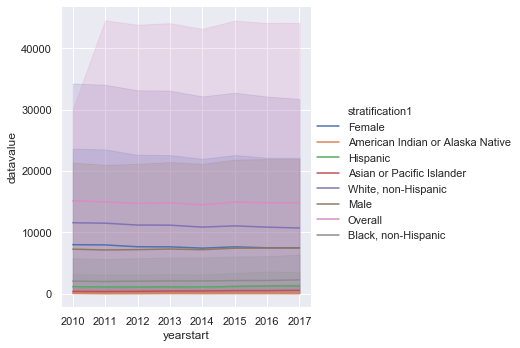

In [20]:
plt.figure(figsize=(30,20))
sns.relplot(data=mortality_heart_ny_df,
            x='yearstart', y='datavalue', hue='stratification1', kind="line")
plt.show()

###### The following plot shows the mortality from diseases of the heart from years 2010-2017. The mortality is relatively consistent from year to year with value around 430,000-450,000. The lowest mortality from diseases of the heart was recorded in year 2014 and the highest was in year 2010.

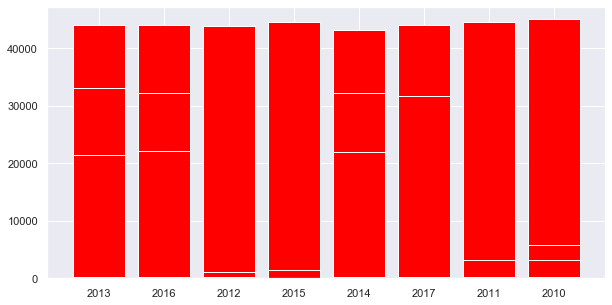

In [21]:
plt.figure(figsize=(10,5))
plt.bar(data=mortality_heart_ny_df, x='yearstart', height='datavalue', color = 'red')
plt.show()

In [22]:
mortality_heartfail_ny_df = new_cardio_ny_df[new_cardio_ny_df['question']=='Mortality from heart failure']

In [23]:
mortality_heartfail_ny_df

,yearstart,locationabbr,topic,question,datavalue,stratification1
7565,2015,NY,Cardiovascular Disease,Mortality from heart failure,118.3,"White, non-Hispanic"
17446,2015,NY,Cardiovascular Disease,Mortality from heart failure,42.2,Hispanic
125124,2017,NY,Cardiovascular Disease,Mortality from heart failure,88.7,Female
127219,2017,NY,Cardiovascular Disease,Mortality from heart failure,79.3,Male
127314,2017,NY,Cardiovascular Disease,Mortality from heart failure,121.4,"White, non-Hispanic"
...,...,...,...,...,...,...
757561,2010,NY,Cardiovascular Disease,Mortality from heart failure,69.4,Overall
757563,2010,NY,Cardiovascular Disease,Mortality from heart failure,15762.0,Overall
758213,2010,NY,Cardiovascular Disease,Mortality from heart failure,60.0,"Black, non-Hispanic"
758643,2010,NY,Cardiovascular Disease,Mortality from heart failure,785.0,Hispanic


###### The following graph shows the mortality from heart failure by race and gender from years 2010-2017. Based on the graph, Hispanic population has the highest mortality from heart failure whereas Asian or Pacific Islander population has the lowest. We can also see that female has a higher mortality from heart failure than male.

<Figure size 2160x1440 with 0 Axes>

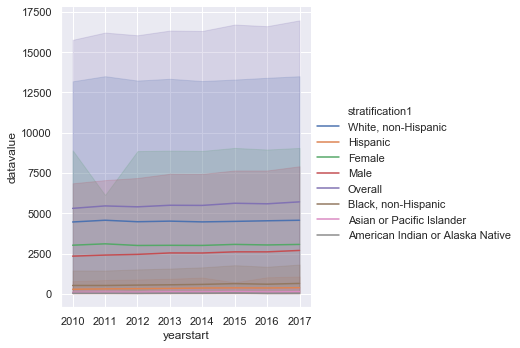

In [24]:
plt.figure(figsize=(30,20))
sns.relplot(data=mortality_heartfail_ny_df,
            x='yearstart', y='datavalue', hue='stratification1', kind="line")
plt.show()

###### The following plot shows the mortality from heart failure from years 2010-2017. There is a slight upward trend from year to year. In year 2010, mortality is below 16,000. By 2017, the mortality is around 17,000. 

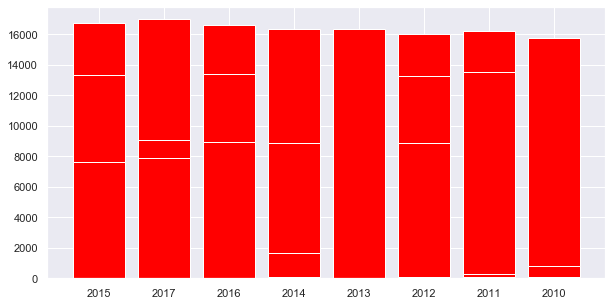

In [25]:
plt.figure(figsize=(10,5))
plt.bar(data=mortality_heartfail_ny_df, x='yearstart', height='datavalue', color = 'red')
plt.show()

In [26]:
mortality_coronary_ny_df = new_cardio_ny_df[new_cardio_ny_df['question']=='Mortality from coronary heart disease']

In [27]:
mortality_coronary_ny_df

,yearstart,locationabbr,topic,question,datavalue,stratification1
2017,2016,NY,Cardiovascular Disease,Mortality from coronary heart disease,4164.0,"Black, non-Hispanic"
5452,2012,NY,Cardiovascular Disease,Mortality from coronary heart disease,4141.0,"Black, non-Hispanic"
5871,2016,NY,Cardiovascular Disease,Mortality from coronary heart disease,49.0,American Indian or Alaska Native
6707,2010,NY,Cardiovascular Disease,Mortality from coronary heart disease,17156.0,Female
10155,2015,NY,Cardiovascular Disease,Mortality from coronary heart disease,15022.0,Female
...,...,...,...,...,...,...
757090,2010,NY,Cardiovascular Disease,Mortality from coronary heart disease,87.0,Asian or Pacific Islander
757475,2010,NY,Cardiovascular Disease,Mortality from coronary heart disease,171.5,Female
757941,2010,NY,Cardiovascular Disease,Mortality from coronary heart disease,144.4,"Black, non-Hispanic"
758111,2010,NY,Cardiovascular Disease,Mortality from coronary heart disease,98.6,American Indian or Alaska Native


###### The following graph shows the mortality from coronary heart disease by race and gender from years 2010-2017. Based on the graph, Hispanic population has the highest mortality from coronary heart disease whereas American Indian or Alaska Native population has the lowest. We can also see that female and male have about the same mortality from coronary heart disease.

<Figure size 2160x1440 with 0 Axes>

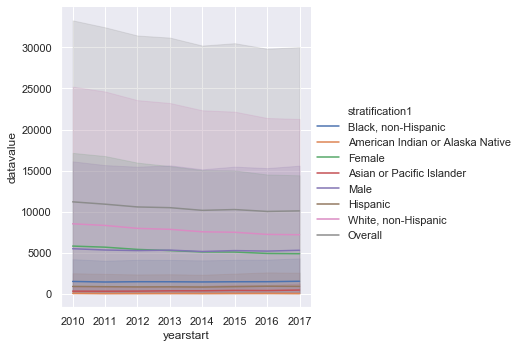

In [28]:
plt.figure(figsize=(30,20))
sns.relplot(data=mortality_coronary_ny_df,
            x='yearstart', y='datavalue', hue='stratification1', kind="line")
plt.show()

###### The following plot shows the mortality from coronary heart disease from years 2010-2017. There is a slight downward trend from year to year. In year 2010, mortality is around 34,000. In 2017, the mortality is around 30,000. 

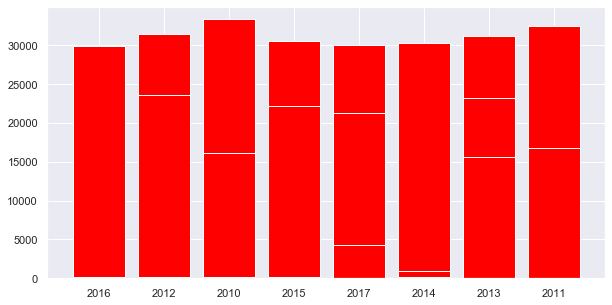

In [29]:
plt.figure(figsize=(10,5))
plt.bar(data=mortality_coronary_ny_df, x='yearstart', height='datavalue', color = 'red')
plt.show()

In [30]:
mortality_stroke_ny_df = new_cardio_ny_df[new_cardio_ny_df['question']=='Mortality from cerebrovascular disease (stroke)']

In [31]:
mortality_stroke_ny_df

,yearstart,locationabbr,topic,question,datavalue,stratification1
2916,2015,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),3653.0,Female
5189,2016,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),299.0,Asian or Pacific Islander
30400,2014,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),31.5,Overall
127545,2017,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),894.0,"Black, non-Hispanic"
128021,2017,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),16.2,Hispanic
...,...,...,...,...,...,...
755234,2010,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),4787.0,"White, non-Hispanic"
755909,2010,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,American Indian or Alaska Native
756680,2010,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,American Indian or Alaska Native
756987,2010,NY,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),28.1,Male


###### The following graph shows the mortality from stroke by race and gender from years 2010-2017. Based on the graph, White population has the highest mortality from heart failure whereas Asian or Pacific Islander population has the lowest. We can also see that female has a much higher mortality from stroke than male.

<Figure size 2160x1440 with 0 Axes>

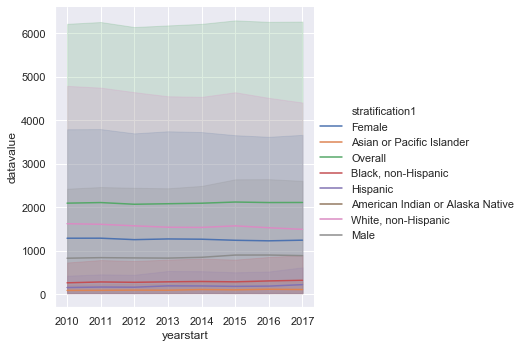

In [32]:
plt.figure(figsize=(30,20))
sns.relplot(data=mortality_stroke_ny_df,
            x='yearstart', y='datavalue', hue='stratification1', kind="line")
plt.show()

###### The following plot shows the mortality from stroke from years 2010-2017 and the mortality has been relatively consistent at around 6,100-6,300.

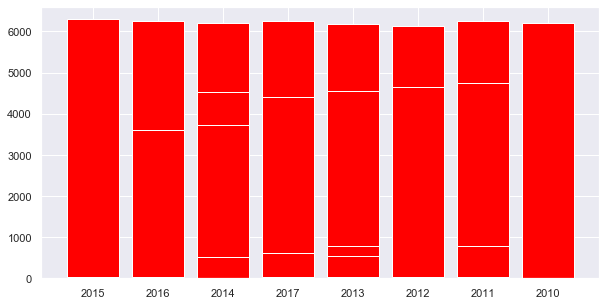

In [33]:
plt.figure(figsize=(10,5))
plt.bar(data=mortality_stroke_ny_df, x='yearstart', height='datavalue', color = 'red')
plt.show()

In [34]:
mortality_total_ny_df = new_cardio_ny_df[new_cardio_ny_df['question']=='Mortality from total cardiovascular diseases']

In [35]:
mortality_total_ny_df

,yearstart,locationabbr,topic,question,datavalue,stratification1
4362,2013,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,1602.0,Asian or Pacific Islander
42066,2014,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,111.0,Hispanic
126499,2017,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,110.6,Asian or Pacific Islander
126616,2017,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,163.1,Hispanic
127346,2017,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,2028.0,Asian or Pacific Islander
...,...,...,...,...,...,...
756162,2010,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,1371.0,Asian or Pacific Islander
756758,2010,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,203.5,Hispanic
756915,2010,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,294.0,Male
758101,2010,NY,Cardiovascular Disease,Mortality from total cardiovascular diseases,139.1,Asian or Pacific Islander


###### The following graph shows the mortality from total cardiovascular diseases by race and gender from years 2010-2017. Based on the graph, White population has the highest mortality from total cardiovascular diseases whereas American Indian or Alaska Native population has the lowest. We can also see that female has a slightly higher mortality from total cardiovascular diseases than male.

<Figure size 2160x1440 with 0 Axes>

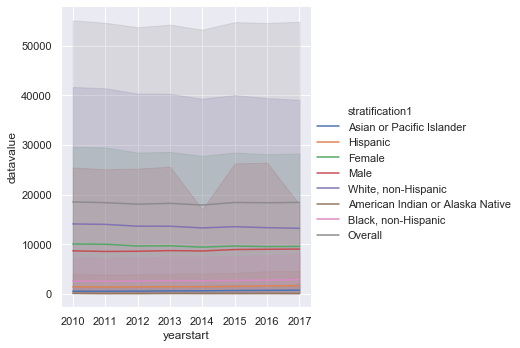

In [36]:
plt.figure(figsize=(30,20))
sns.relplot(data=mortality_total_ny_df,
            x='yearstart', y='datavalue', hue='stratification1', kind="line")
plt.show()

# Conclusion

###### The following plot shows the mortality from total cardiovascular diseases from years 2010-2017. Overall, the US mortality from cardiovascular diseases have remained relatively consistent across years 2010-2017.  From ealier graphs or plots, White and Hispanic population are most the vulnerable population to mortality from cardiovascular diseases and Asian or Pacific Islanders as well as well American Indian or Alaska Native are the least vulnerable. Female also seem to have a slighly higher mortality than male population from cardiovascular diseases. 

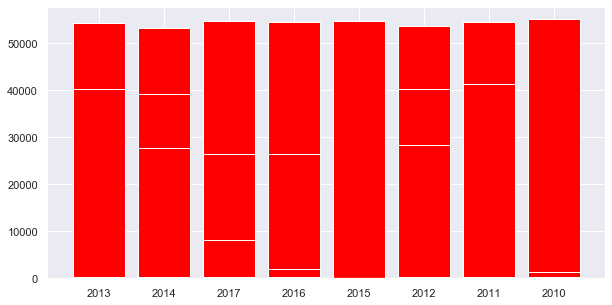

In [37]:
plt.figure(figsize=(10,5))
plt.bar(data=mortality_total_ny_df, x='yearstart', height='datavalue', color = 'red')
plt.show()